In [273]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import PolynomialFeatures

In [200]:
columns = pd.read_csv('DATA.csv').iloc[1]

In [201]:
df = pd.read_csv('DATA.csv', header = 2)
df = df.drop([0])
df = df.drop([6031])
df

,Дата,Скважина,Пласт,Куст,Цех,Тип скважины,Диаметр экспл.колонны,Диаметр НКТ,Диаметр штуцера,Глубина верхних дыр перфорации,...,ГП - Забойное давление,ГП(ИДН) Дебит жидкости,ГП(ИДН) Дебит жидкости скорр-ый,ГП(ИДН) Дебит нефти,ГП(ИДН) Прирост дефита нефти,ГП(ГРП) Дебит жидкости,ГП(ГРП) Дебит жидкости скорр-ый,ГП(ГРП) Дебит нефти,ГП(ГРП) Прирост дефита нефти,ГП - Общий прирост Qн
1,01.2019,"""896Б""",БС10,109,ЦДHГ-1,Наклонно-направленно,"124,00","73,00","32,00","2 744,00",...,"22,00","74,35","74,35","2,18","0,10","305,07","305,07","8,96","6,78","6,87"
2,01.2019,"""896Б""",БС10,109,ЦДHГ-1,Наклонно-направленно,"124,00","73,00","32,00","2 682,00",...,"22,00","81,77","81,77","0,92","0,02","296,41","296,41","3,34","2,42","2,44"
3,02.2019,"""896Б""",БС10,109,ЦДHГ-1,Наклонно-направленно,"124,00","73,00","32,00","2 744,00",...,"22,00","86,63","86,63","2,22","0,16","341,29","341,29","8,73","6,51","6,67"
4,02.2019,"""896Б""",БС10,109,ЦДHГ-1,Наклонно-направленно,"124,00","73,00","32,00","2 682,00",...,"22,00","95,76","95,76","0,94","0,05","334,01","334,01","3,27","2,33","2,38"
5,04.2019,"""896Б""",БС10,109,ЦДHГ-1,Наклонно-направленно,"124,00","73,00","32,00","2 744,00",...,"22,00","72,50","72,50","1,58","0,16","299,29","299,29","6,52","4,94","5,10"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6026,11.2018,990,БС10,107,ЦДHГ-1,Наклонно-направленно,"128,00","73,00","32,00","2 680,00",...,"21,00","144,33","144,33","2,48","0,57","591,57","591,57","10,15","7,67","8,25"
6027,11.2019,990,БС10,107,ЦДHГ-1,Наклонно-направленно,"128,00","73,00","32,00","2 680,00",...,"22,40","125,36","125,36","2,15","0,35","516,05","516,05","8,86","6,70","7,05"
6028,12.2018,990,БС10,107,ЦДHГ-1,Наклонно-направленно,"128,00","73,00","32,00","2 680,00",...,"22,00","155,52","155,52","2,67","0,63","604,22","604,22","10,37","7,70","8,33"
6029,12.2019,990,БС10,107,ЦДHГ-1,Наклонно-направленно,"128,00","73,00","32,00","2 680,00",...,"20,50","126,29","126,29","2,17","0,37","521,97","521,97","8,96","6,79","7,16"


In [202]:
# пласт давл, коэф прод, время

In [203]:
df.columns.values

array(['Дата', 'Скважина', 'Пласт', 'Куст', 'Цех', 'Тип скважины',
       'Диаметр экспл.колонны', 'Диаметр НКТ', 'Диаметр штуцера',
       'Глубина верхних дыр перфорации', 'Удлинение',
       'Способ эксплуатации', 'Тип насоса', 'Производительность ЭЦН',
       'Напор', 'Частота', 'Коэффициент сепарации', 'Глубина спуска',
       'Буферное давление', 'Давление в линии', 'Пластовое давление',
       'Динамическая высота', 'Затрубное давление', 'Давление на приеме',
       'Забойное давление', 'Дебит нефти', 'Дебит жидкости',
       'Обводненность', 'Состояние на конец месяца', 'Давление наcыщения',
       'Газовый фактор', 'Температура пласта', 'SKIN', 'JD факт',
       'Дата ГРП', 'Фирма ГРП', 'Вязкость нефти в пластовых условиях',
       'Вязкость воды в пластовых условиях',
       'Вязкость жидкости в пласт. условиях', 'объемный коэффициент',
       'Плотность нефти', 'Плотность воды', 'Высота перфорации',
       'Удельный коэффициент', 'Коэффициент продуктивности',
       'ТП - За

In [204]:
plast = df[['Дата', 'Скважина', 'Пласт', 'Пластовое давление', 'Коэффициент продуктивности']].copy()
plast

,Дата,Скважина,Пласт,Пластовое давление,Коэффициент продуктивности
1,01.2019,"""896Б""",БС10,"209,20","0,41"
2,01.2019,"""896Б""",БС10,"203,70","0,46"
3,02.2019,"""896Б""",БС10,"209,20","0,48"
4,02.2019,"""896Б""",БС10,"203,70","0,53"
5,04.2019,"""896Б""",БС10,"207,30","0,40"
...,...,...,...,...,...
6026,11.2018,990,БС10,"213,89","0,77"
6027,11.2019,990,БС10,"193,00","0,76"
6028,12.2018,990,БС10,"193,00","0,94"
6029,12.2019,990,БС10,"195,00","0,75"


In [205]:
f = plast['Дата']
pust = []
for i in f:
  splitted = i.split('.')
  if len(splitted[0]) == 2:
    d = datetime.strptime(f"{splitted[0]+'.'+splitted[1]}", "%m.%Y").timestamp()
  else:
    d = datetime.strptime(f"{splitted[1]+'.'+splitted[0]}", "%m.%Y").timestamp()
  pust.append(d)
  # print(splitted[0]+'.'+splitted[1])
plast['Дата'] = pust

In [206]:
plast['Пластовое давление'] = plast['Пластовое давление'].map(lambda x: float(x.replace(',', '.')))
plast['Коэффициент продуктивности'] = plast['Коэффициент продуктивности'].map(lambda x: float(x.replace(',', '.')))
plast

,Дата,Скважина,Пласт,Пластовое давление,Коэффициент продуктивности
1,1.546301e+09,"""896Б""",БС10,209.20,0.41
2,1.546301e+09,"""896Б""",БС10,203.70,0.46
3,1.548979e+09,"""896Б""",БС10,209.20,0.48
4,1.548979e+09,"""896Б""",БС10,203.70,0.53
5,1.554077e+09,"""896Б""",БС10,207.30,0.40
...,...,...,...,...,...
6026,1.541030e+09,990,БС10,213.89,0.77
6027,1.572566e+09,990,БС10,193.00,0.76
6028,1.543622e+09,990,БС10,193.00,0.94
6029,1.575158e+09,990,БС10,195.00,0.75


In [268]:
plast['Скважина'].unique()

array(['"896Б"', '1000', '1002', '1015', '1024', '1039', '105', '1056',
       '1059', '1063', '1068', '1075', '1077', '1078', '1087', '1094',
       '1097', '110', '1102', '1115Б', '1116', '1119', '113А', '1147',
       '114Б', '1158', '115Б', '115Р', '118', '1199', '1200', '1201',
       '1202', '1247', '1247Г', '1248', '1249', '128', '132', '1351',
       '1355', '1371', '1396', '143', '144', '1447', '146', '1473', '149',
       '162', '163', '164', '177', '181', '2000', '2006', '2007', '201',
       '2024', '203', '2050', '2057', '2058', '2078', '2080', '2081',
       '2096', '2101', '2103', '2108', '211', '2110', '2111', '2117',
       '2118', '2119', '2121', '2126', '2128', '2143', '2146', '2152',
       '2165', '217', '2175', '2180', '2183', '2184', '2188Б', '2190',
       '2206', '2210', '2211', '2212', '2215', '2228', '2234', '2235',
       '2245', '224Б', '2258Б', '2260', '2264', '2270', '2275', '2276',
       '2277', '2278', '2280', '2284', '2293', '232', '233', '236', '240'

In [332]:
# gr = plast[plast['Скважина'] == '"896Б"']

gr = plast.groupby(['Скважина', 'Дата', 'Пласт']).mean().reset_index()
gr1 = gr[gr['Скважина'] == '"896Б"']
# for date in gr['Дата']:
#   temp_data = gr[gr['Дата'] == date]['Пластовое давление'].mean()
#   print(temp_data)
gr1

,Скважина,Дата,Пласт,Пластовое давление,Коэффициент продуктивности
0,"""896Б""",1.535760e+09,БС10,245.65,0.545
1,"""896Б""",1.538352e+09,БС10,245.65,0.425
2,"""896Б""",1.541030e+09,БС10,245.65,0.390
3,"""896Б""",1.543622e+09,БС10,206.45,0.460
4,"""896Б""",1.546301e+09,БС10,206.45,0.435
5,"""896Б""",1.548979e+09,БС10,206.45,0.505
6,"""896Б""",1.551398e+09,БС10,205.80,0.415
7,"""896Б""",1.554077e+09,БС10,205.80,0.425
8,"""896Б""",1.556669e+09,БС10,205.80,0.570
9,"""896Б""",1.559347e+09,БС10,202.50,0.630


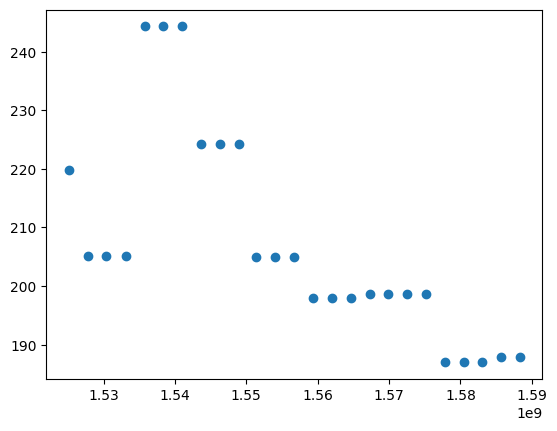

In [323]:
plt.scatter(gr1['Дата'], gr1['Пластовое давление'])

In [209]:
# генер лин модел давл пл и коэф прод, 2. написать мл (давл, коэф, дата)

In [210]:
uniques = gr['Скважина'].unique()

In [211]:
gr = gr.drop(['Пласт'], axis = 1)
gr

,Скважина,Дата,Пластовое давление,Коэффициент продуктивности
0,"""896Б""",1.535760e+09,245.65,0.545
1,"""896Б""",1.538352e+09,245.65,0.425
2,"""896Б""",1.541030e+09,245.65,0.390
3,"""896Б""",1.543622e+09,206.45,0.460
4,"""896Б""",1.546301e+09,206.45,0.435
...,...,...,...,...
4394,990,1.577837e+09,195.00,0.750
4395,990,1.580515e+09,195.00,0.730
4396,990,1.583021e+09,195.00,0.720
4397,990,1.585699e+09,193.99,0.720


In [ ]:
models_list = {}

for i in uniques:
  df_temp = gr[gr['Скважина'] == i][['Дата', 'Пластовое давление', 'Коэффициент продуктивности']]
  # print(df_temp)
  if len(df_temp) < 10:
    continue

  X, y = df_temp['Дата'], df_temp[['Пластовое давление', 'Коэффициент продуктивности']]
  X = X.array.reshape(len(X),1)

  # X = np.asarray(X, dtype='float64')
  y = np.asarray(y, dtype='float64')
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12)

  # X_train = X_train.array.reshape(1, -1)
  # X_test = X_test.array.reshape(1, -1)

  model = LinearRegression()
  model.fit(X_train, y_train)
  prediction = model.predict(X_test)

  models_list[i] = model

  print(prediction, y_test)
  # print(i+'--------------------------')
  # print(X, y)
  # print('--------------------------')

In [215]:
models_list[uniques[0]]

LinearRegression()

In [246]:
a = input()
a = datetime.strptime(f"{a}", "%m.%Y").timestamp()
a = np.array([a])
a = a.reshape(1,1)
pred = models_list[uniques[0]].predict(a)
print(f"{uniques[0]} {models_list[uniques[0]].predict(a)}")

01.2040
"896Б" [[-295.45230279    3.63099652]]


3.6309965159360793

In [227]:
gr['Дата'].max()

1588291200.0

In [233]:
datetime.strptime("03.2020", "%m.%Y").timestamp()

1583020800.0

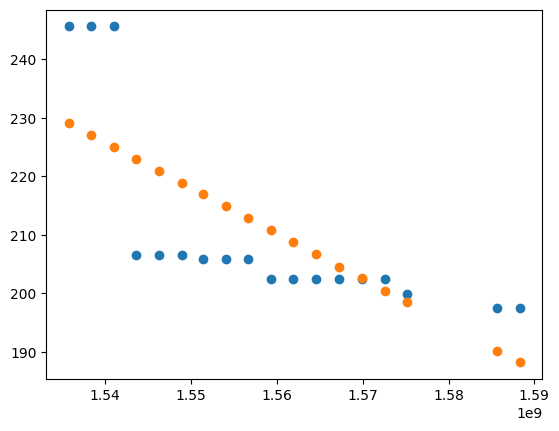

In [258]:
temp_df = pd.DataFrame(columns = ['Дата', 'Пластовое давление', 'Коэффициент продуктивности'])
# temp_df = gr1[['Дата', 'Пластовое давление', 'Коэффициент продуктивности']].copy()

for date in gr1['Дата']:
  a = date
  a = np.array([a])
  a = a.reshape(1,1)
  # print(date, models_list['"896Б"'].predict(a))
  temp_df.loc[ len(temp_df.index )] = [date, models_list['"896Б"'].predict(a)[0][0], models_list['"896Б"'].predict(a)[0][1]]


plt.scatter(gr1['Дата'], gr1['Пластовое давление'])
plt.scatter(temp_df['Дата'], temp_df['Пластовое давление'])

In [260]:
mean_absolute_percentage_error(gr1['Пластовое давление'], temp_df['Пластовое давление'])

0.04290767701345717

In [ ]:
temp_df['Пластовое давление'], gr1['Пластовое давление']

In [ ]:
models_list = {}

for i in uniques:
  df_temp = gr[gr['Скважина'] == i][['Дата', 'Пластовое давление', 'Коэффициент продуктивности']]
  # print(df_temp)
  if len(df_temp) < 10:
    continue

  X, y = df_temp['Дата'], df_temp[['Пластовое давление', 'Коэффициент продуктивности']]

  X = np.array(X)
  y = np.array(y)
  poly = PolynomialFeatures(degree=3, include_bias=False)


  # X = X.array.reshape(len(X),1)
  # X = np.asarray(X, dtype='float64')
  y = np.asarray(y, dtype='float64')
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12)
  poly_features = poly.fit_transform(X_train.reshape(-1, 1))

  # X_train = X_train.array.reshape(1, -1)
  # X_test = X_test.array.reshape(1, -1)

  model = LinearRegression()
  model.fit(poly_features, y_train)
  prediction = model.predict(poly.fit_transform(X_test.reshape(-1, 1)))

  models_list[i] = model

  # print(prediction, y_test)

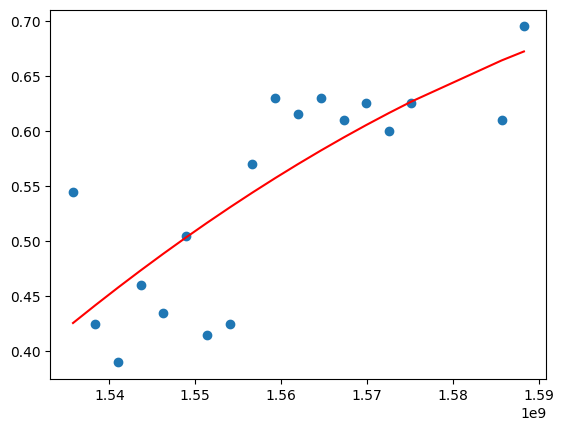

In [333]:
temp_df = pd.DataFrame(columns = ['Дата', 'Пластовое давление', 'Коэффициент продуктивности'])
# temp_df = gr1[['Дата', 'Пластовое давление', 'Коэффициент продуктивности']].copy()

for date in gr1['Дата']:
  a = date
  a = np.array([a])
  a = poly.fit_transform(a.reshape(-1, 1))
  # print(date, models_list['"896Б"'].predict(a))
  temp_df.loc[ len(temp_df.index )] = [date, models_list['"896Б"'].predict(a)[0][0], models_list['"896Б"'].predict(a)[0][1]]


plt.scatter(gr1['Дата'], gr1['Коэффициент продуктивности'])
plt.plot(temp_df['Дата'], temp_df['Коэффициент продуктивности'], color ='red')

In [330]:
mean_absolute_percentage_error(gr1['Коэффициент продуктивности'], temp_df['Коэффициент продуктивности'])

0.05195919472926693

In [ ]:
gr1['Пластовое давление'].reset_index(), temp_df['Пластовое давление']

In [334]:
import pickle

with open("data.pickle", "wb") as file:
    pickle.dump(models_list, file)

In [335]:
with open("data.pickle", "rb") as file:
    loaded_models = pickle.load(file)

In [336]:
loaded_models['"896Б"']

LinearRegression()

In [343]:
pressure = input()
Q = -temp_df['Коэффициент продуктивности'][0]*int(pressure)+temp_df['Пластовое давление'][0]
Q

10


237.1006336708963